# Calculating cooling degree days 

## 1. Where can we expect to experience the most cooling degree days?

* Albany 
* NY City
* Fresno
* Seattle


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt # handles dates for us

###############################################################################
# local modules: 
#
# Make sure you have acis.py in the same folder together with this notebook!!!
###############################################################################
import acis as ac # download and load functions for daily data

In this script we use the module acis again. This allows us to access the GHCN-daily station data from the server in Cornell.

We need the following functions from this module:

* *ac.download_stationdata_dly_years*
* *ac.load_station_data_dly*


In [2]:
#################################################
# Control variables 
#################################################
# first and last year to download
yr1, yr2 = 1950 , 2018

d1=dt.datetime(yr1,1,1)
d2=dt.datetime(yr2,12,31)
# datetime objects can calculate the number of days for us
# We need ndays to create the correct 2-dimensional data array for tmax below
diff=d2-d1
ndays=diff.days+1


###########################################################
# The new way with a dictionary named stationlist
###########################################################
stations={'USW00014735':'Albany AP',
          'USW00094728':'New York CNTRL PK TWR',
          'USW00024233':'Seattle_Tacoma_Intl_AP',
          'USW00093193':'Fresno_Yosemite_Intl_AP'}




### We apply now the dictionary and download  the four station data from the server



In [3]:
for key in stations:# key is the station id e.g. USW00014735
    print ("Get data for station "+stations[key])
    filename=key+"_"+str(yr1)+"-"+str(yr2)+"_dly.csv"
    print ("download data to local file "+filename)
    result=ac.download_stationdata_dly_years(key,startyear=yr1,endyear=yr2)


Get data for station Albany AP
download data to local file USW00014735_1950-2018_dly.csv
################################################################################
# send data request to http://data.rcc-acis.org/StnData
################################################################################
saved data to local file USW00014735_1950-2018_dly.csv
data columns are:
0 : date
1 : min_temp
2 : mean_temp
3 : max_temp
4 : pcpn
5 : snow
Get data for station New York CNTRL PK TWR
download data to local file USW00094728_1950-2018_dly.csv
################################################################################
# send data request to http://data.rcc-acis.org/StnData
################################################################################
saved data to local file USW00094728_1950-2018_dly.csv
data columns are:
0 : date
1 : min_temp
2 : mean_temp
3 : max_temp
4 : pcpn
5 : snow
Get data for station Seattle_Tacoma_Intl_AP
download data to local file USW00024233_1950-2018_

### Reading the local CSV spreadsheet files 

 

In [4]:
print(80*"=")
# number of rows is ndays
# ndays we got already thanks to the datetime package
nstation=len(stations)
x=np.zeros( [ndays,nstation])
print(np.shape(x))
j=0
label=[]
for key in stations:
    label.append(stations[key])
    filename=key+"_"+str(yr1)+"-"+str(yr2)+"_dly.csv"
    print ("read data from local file "+filename)
    data,col_names=ac.load_station_data_dly(filename)
    # get tmean from data
    x[:,j]=data[:,4]
    years=data[:,0]
    months=data[:,1]
    days=data[:,2]
    j=j+1


(25202, 4)
read data from local file USW00014735_1950-2018_dly.csv
number of data rows: 25202
returns the 2-d arrays with columns
0 year
1 month
2 day
3 min_temp
4 mean_temp
5 max_temp
6 pcpn
7 snow
read data from local file USW00094728_1950-2018_dly.csv
number of data rows: 25202
returns the 2-d arrays with columns
0 year
1 month
2 day
3 min_temp
4 mean_temp
5 max_temp
6 pcpn
7 snow
read data from local file USW00024233_1950-2018_dly.csv
number of data rows: 25202
returns the 2-d arrays with columns
0 year
1 month
2 day
3 min_temp
4 mean_temp
5 max_temp
6 pcpn
7 snow
read data from local file USW00093193_1950-2018_dly.csv
number of data rows: 25202
returns the 2-d arrays with columns
0 year
1 month
2 day
3 min_temp
4 mean_temp
5 max_temp
6 pcpn
7 snow


### Calculate total cooling degree days for each year for a range of years

Now let's calculate the total CDDs per year for a range of years for each station. 
- First define the range of years of interest. 
- Use np.zeroes to create a 2-d array that can store the CDDs for each year for each station. 
- Then loop through each year
    - apply the previous code block to calculate CDDs 
    - assign the result to the data array (apply row, column index to fill in one value)for each year for each station. 
- Lastly, plot the results. 


Note: For stations with incomplete data, there is a RunTimeWarning while running this code. It appears that when calculating the CDDs by subtracting 65.0 from the mean temperature data, python likely encountered a nan value(s) within the mean temperature array (for the years 2009 and 2015). However, everything still appears to have worked as Python likely kept those nan values as nan and moved on. This is fine because when summing the CDDs for each year, we ignore the nan values.

### Calculation of Cooling Degree Days for one selected station and for one year

The data we work with are in the variable x (2-dim array).
The date information is in arrays years, months, days
(It is the same time range in all station data files)


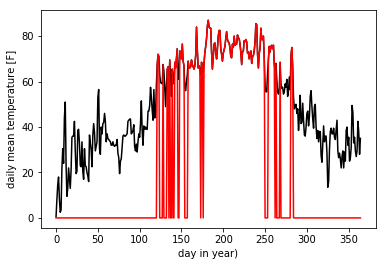

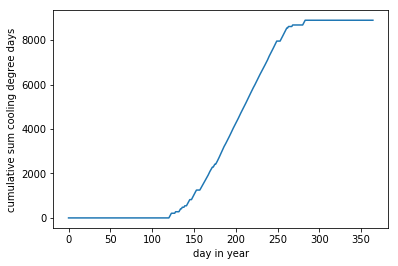

CDD for the selected station:  Albany AP
8891.0


In [5]:
isYear = years == 2018 # np.array with True False values
istation=0 # one station from the four
mean_temp=x[isYear,istation]
tbase=65
plt.plot(mean_temp,color='black')
tempadd=np.where(mean_temp>tbase,mean_temp,0) 
plt.plot(tempadd,color='red')
plt.xlabel("day in year)")
plt.ylabel("daily mean temperature [F]")
plt.show()

plt.plot(np.cumsum(tempadd))
plt.xlabel("day in year")
plt.ylabel("cumulative sum cooling degree days")
plt.show()
print ("CDD for the selected station: ",label[istation])
print (np.sum(tempadd))


In [6]:
yr1 = 1950
yr2 = 2018
process_years = np.arange(yr1,yr2+1,1)
nYears = len(years)
cdd_years = np.zeros((nYears,nstation))


In [7]:
%matplotlib inline 

## Trend analysis 1950-2018 

### References

Cooling degree days:
    
    
* Definition of cooling degree days (CDD) with base 65F:
    * [see the National Weather Service](https://www.weather.gov/key/climate_heat_cool)
* What are cooling degree days and how can we use them as indices for climate change?
    * [see EPA](https://www.epa.gov/climate-indicators/climate-change-indicators-heating-and-cooling-degree-days)
* Global Historical Climate Network - Daliy FTP site: [ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily](ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily) 
